In [1]:
import random
import time
import numpy as np
from matplotlib import pyplot as plt
import tkinter as tk   #Use tkinter for GUI
from PIL import Image, ImageTk  # Use PIL for image loading and manipulation

In [2]:
class GridWorldGUI:
    """
    A graphical user interface (GUI) for a grid world environment where an agent navigates to collect an item 
    and deliver it to a target location. The environment is visualized using tkinter.
    """
    def __init__(self, size=5, target_location=None):
        """
        Initialize the GridWorldGUI with a grid of the given size and set up the GUI elements.
        
        Args:
            size (int): The size of the grid (default is 5).
            target_location (tuple): The target position in the grid (default is the bottom-right corner).
        """
        self.size = size
        self.agent_position = self.random_position()
        self.item_position = self.random_position()
        self.target_position = target_location if target_location else (size - 1, size - 1)
        self.has_item = False
        self.time_taken = 0
        self.steps = 0
        self.block_cells={} # Dictionary to store blocked cells (unused in current code)
        self.time_taken = 0
        self.best_steps = float('inf')
        self.best_time = float('inf')
        # Create the tkinter window and canvas
        self.window = tk.Tk()
        self.window.title("Grid World")
        self.canvas = tk.Canvas(self.window, width=400, height=400)
        self.canvas.pack()
        self.cell_size = 400 // self.size
        self.min_steps="null"
        self.episodes=0

        # Create the tkinter window and canvas
        self.agent_img = ImageTk.PhotoImage(Image.open("icon/agent.png").resize((self.cell_size, self.cell_size)))
        self.item_img = ImageTk.PhotoImage(Image.open("icon/item.png").resize((self.cell_size, self.cell_size)))
        self.target_img = ImageTk.PhotoImage(Image.open("icon/target.png").resize((self.cell_size, self.cell_size)))
        
        # Labels for statistics
        self.episodes_label = tk.Label(self.window, text="current episode: 0")
        self.episodes_label.pack()
        self.steps_label = tk.Label(self.window, text="Steps: 0")
        self.steps_label.pack()
        self.time_label = tk.Label(self.window, text="Time: 0.0s")
        self.time_label.pack()
        
        self.Min_steps_label = tk.Label(self.window, text="Optimal_steps = unknow")
        self.Min_steps_label.pack()
        
    def random_position(self):
        """
        Generate a random position within the grid.

        Returns:
            tuple: A random (x, y) position within the grid.
        """
        
        return (random.randint(0, self.size - 1), random.randint(0, self.size - 1))
        
    def calculate_optimal_steps(self):
        """
        Calculate the optimal number of steps required for the agent to collect the item and reach the target.

        Returns:
            int: The minimum number of steps needed.
        """

        distance_agent_to_item = abs(self.agent_position[0] - self.item_position[0]) + abs(
            self.agent_position[1] - self.item_position[1])

        # Calculate the Manhattan distance from the item to the target
        distance_item_to_target = abs(self.item_position[0] - self.target_position[0]) + abs(
            self.item_position[1] - self.target_position[1])

        # The optimal steps are the sum of the two distances
        return distance_agent_to_item + distance_item_to_target
        
    def reset(self,debug=True):
        """
        Reset the environment by placing the agent and item in random positions and clearing previous state.
        
        Args:
            debug (bool): If True, the GUI is not updated after reset (default is False).
        
        Returns:
            tuple: The initial positions of the agent, item, and the has_item flag.
        """
        self.agent_position = self.random_position()
        self.item_position = self.random_position()
        self.has_item = False
        self.min_steps=self.calculate_optimal_steps()
        if not debug:
            self.update_gui()
        return self.agent_position, self.item_position, self.has_item

    def step(self, action,debug=True):
        """
        Execute a step in the environment based on the action provided, updating the agent's position.
        
        Args:
            action (str): The action to be taken by the agent ('north', 'south', 'west', 'east').
            debug (bool): If True, the GUI is not updated after the step (default is False).
        
        Returns:
            tuple: The new positions of the agent, item, has_item flag.
            int: The reward obtained for the action.
            bool: Whether the episode has ended.
        """
        x, y = self.agent_position

        if action == 'north' and y > 0:
            y -= 1
        elif action == 'south' and y < self.size - 1:
            y += 1
        elif action == 'west' and x > 0:
            x -= 1
        elif action == 'east' and x < self.size - 1:
            x += 1

        self.agent_position = (x, y)
#!!!!!!!!!!!!!!!!!!!!!!!reward structures!!!!!!!!!!!!!!!!!!!!!!!!!
        reward = -1
        done = False
        # Check if the agent has reached the item
        if self.agent_position == self.item_position and not self.has_item:
            self.has_item = True
            reward = 10

        # If the agent has the item, the item moves with the agent
        if self.has_item:
            self.item_position = self.agent_position
        # Check if the agent has reached the target with the item
        if self.agent_position == self.target_position and self.has_item:
            reward = 100
            done = True
        # if self.agent_position == self.target_position and not self.has_item:
        #     reward = -10
            
        if not debug:
            self.update_gui()
        return (self.agent_position, self.item_position, self.has_item), reward, done
        
#!!!!!!!!!!!!!!!!!!!!!!!reward structures!!!!!!!!!!!!!!!!!!!!!!!!!
    def update_gui(self):
        self.canvas.delete("all")
        for i in range(self.size):
            for j in range(self.size):
                x1 = i * self.cell_size
                y1 = j * self.cell_size
                x2 = x1 + self.cell_size
                y2 = y1 + self.cell_size
                self.canvas.create_rectangle(x1, y1, x2, y2, outline="black")

        # Place the target image
        self.canvas.create_image(self.target_position[0] * self.cell_size,
                                 self.target_position[1] * self.cell_size,
                                 anchor=tk.NW, image=self.target_img)

        # Place the item image
        # if not self.has_item: #not use
        self.canvas.create_image(self.item_position[0] * self.cell_size,
                                 self.item_position[1] * self.cell_size,
                                 anchor=tk.NW, image=self.item_img)

        # Place the agent image
        self.canvas.create_image(self.agent_position[0] * self.cell_size,
                                 self.agent_position[1] * self.cell_size,
                                 anchor=tk.NW, image=self.agent_img)

        if self.has_item:
            # Optionally, indicate that the agent is carrying the item
            self.canvas.create_text(self.agent_position[0] * self.cell_size + self.cell_size // 2,
                                    self.agent_position[1] * self.cell_size + self.cell_size // 2,
                                    text="", fill="white", font=("Arial", 24))
            # Update labels with the latest statistics
        self.steps_label.config(text=f"Steps: {self.steps}")
        self.time_label.config(text=f"Time: {self.time_taken:.2f}s")
        # self.best_record_label.config(text=f"Best Record: Steps = {self.best_steps}, Time = {self.best_time:.2f}s")
        self.Min_steps_label.config(text=f"optimal_steps = {self.min_steps}")
        self.episodes_label.config(text=f"current episode: {self.episodes}")

        self.window.update()

    def update_statistics(self, steps, time_taken):
        """
        Update the statistics such as steps taken and time taken for the current episode.

        Args:
            steps (int): The number of steps taken in the current episode.
            time_taken (float): The time taken in the current episode.
        """
        self.steps = steps
        self.time_taken = time_taken
        if steps < self.best_steps or (steps == self.best_steps and time_taken < self.best_time):
            self.best_steps = steps
            self.best_time = time_taken
        self.update_gui()

In [3]:
class QLearningAgentGUI:
    """
    A Q-learning agent that interacts with the GridWorldGUI environment, learning the optimal policy to 
    navigate the grid, collect an item, and reach the target.
    """
    
    def __init__(self, env, learning_rate=0.1, discount_factor=0.9, epsilon=0.05, delay=0):
        """
        Initialize the Q-learning agent with parameters for learning and exploration.

        Args:
            env (GridWorldGUI): The environment the agent interacts with.
            learning_rate (float): The learning rate (alpha) for updating Q-values (default is 0.1).
            discount_factor (float): The discount factor (gamma) for future rewards (default is 0.9).
            epsilon (float): The probability of choosing a random action (epsilon-greedy policy) (default is 0.05).
            delay (float): Time delay between actions for visualizing the agent's behavior (default is 0).
        """
        
        self.env = env
        self.q_table = {} # Dictionary to store Q-values for state-action pairs
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.actions = ['north', 'south', 'west', 'east']
        self.delay = delay  # Delay in seconds

        # Tracking successful episodes and steps
        self.successful_episodes = 0
        self.actual_steps = []
        self.optimal_steps = []


    def get_q_value(self, state, action):
        """
        Get the Q-value for a given state-action pair.

        Args:
            state (tuple): The current state (agent position, item position, has_item flag).
            action (str): The action taken by the agent.

        Returns:
            float: The Q-value for the state-action pair.
        """
        
        return self.q_table.get((state, action), 0.0)

    def update_q_value(self, state, action, reward, next_state):
        """
        Update the Q-value for a given state-action pair using the Q-learning update rule.

        Args:
            state (tuple): The current state.
            action (str): The action taken.
            reward (int): The reward received after taking the action.
            next_state (tuple): The state reached after taking the action.
        """
        best_next_action = max(self.actions, key=lambda a: self.get_q_value(next_state, a))
        best_next_q_value = self.get_q_value(next_state, best_next_action)
        current_q_value = self.get_q_value(state, action)

        new_q_value = current_q_value + self.learning_rate * (
            reward + self.discount_factor * best_next_q_value - current_q_value)
        #Q(S, A) = Q(S, A) + α (R + γ max Q(S′, a′) − Q(S, A))
        self.q_table[(state, action)] = new_q_value

    def choose_action(self, state):
        """
        Choose an action based on Q-Value. (We don't choose random action cause epsilon = 0)

        Args:
            state (tuple): The current state.

        Returns:
            str: The action chosen by the agent.
        """
        if random.random() < self.epsilon:
            return random.choice(self.actions) # Explore: random action
        else:
            # Exploit: choose the action with the highest Q-value
            max_q_value = float("-inf")
            best_action = None
            
            for action in self.actions:
                q_value = self.get_q_value(state, action)
                if q_value >= max_q_value:
                    max_q_value = q_value
                    best_action = action
        
            return best_action 
            # return max(self.actions, key=lambda action: self.get_q_value(state, action))
            

    def train_old(self, episodes=1000,delay=0):
        """
        Train the agent by running it through multiple episodes and updating Q-values.

        Args:
            episodes (int): The number of episodes to train for (default is 1000).
            delay (float): Time delay between steps for visualization (default is 0.1).
        """
        for episode in range(episodes):
            state = self.env.reset()
            done = False
            # time.sleep(10)
            # print("now we are at ",episode+1)
            start_time = time.time()
            steps = 0
            optimal_steps = self.env.calculate_optimal_steps()  # Calculate optimal steps
            self.env.episodes=episode+1

            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update_q_value(state, action, reward, next_state)
                state = next_state
                steps += 1
                time.sleep(delay)  # Add a delay between steps to slow down the visualization
                self.env.steps = steps
                self.env.time_taken = time.time()-start_time
                self.env.update_gui()
            # if self.env.agent_position == self.env.target_position and self.env.has_item:
            self.successful_episodes += 1  # Increment successful episodes counter
            self.actual_steps.append(steps)  # Store actual steps
            self.optimal_steps.append(optimal_steps)  # Store optimal steps
            total_time = time.time() - start_time
             # show the chart
            # self.visualize_steps_chart()
            
            self.env.update_statistics(steps, total_time)
        self.visualize_steps_chart()
        #Calculate the Manhattan distance from the agent to the item

    def visualize_steps_chart(self):
        # Plot the real vs. optimal steps over successful episodes
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, self.successful_episodes + 1), self.actual_steps, label="Actual Steps")
        plt.plot(range(1, self.successful_episodes + 1), self.optimal_steps, label="Optimal Steps", linestyle="--")
        plt.xlabel("Episodes")
        plt.ylabel("Steps")
        plt.title("Training Performance")
        plt.legend()
        plt.show()
            


In [4]:
def test_agent(agent, episodes=1000):
    """
    Test the trained agent by running it through several episodes and collecting statistics.

    Args:
        agent (QLearningAgentGUI): The trained Q-learning agent.
        episodes (int): The number of test episodes to run (default is 5).

    Returns:
        tuple: Average steps to collect the item, average steps in total.
    """
    steps_d_taken = []
    steps_t_taken = []
    for _ in range(episodes):
        state = agent.env.reset(debug=True)
        done = False
        steps = 0
        
        flag = False
        while not done:
            action = agent.choose_action(state)
            state, _, done = agent.env.step(action,debug=True)
            
            steps += 1
            # print(agent.env.has_item)
            if state[2] and not flag:  # Check if the agent has picked up the item
                # print(steps)

                flag = state[2]
                steps_t_taken.append(steps)
        steps_d_taken.append(steps)
    avg_d_steps = np.mean(steps_d_taken)
    avg_t_steps = np.mean(steps_t_taken)
    return  avg_d_steps, avg_t_steps,


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import deque

class DQNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQNetwork, self).__init__()
        self.fc1 = nn.Linear(state_size, 24)
        self.fc2 = nn.Linear(24, 24)
        self.fc3 = nn.Linear(24, action_size)

    def forward(self, state):
        x = torch.relu(self.fc1(state))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)


In [6]:
class ReplayBuffer:
    def __init__(self, buffer_size):
        self.memory = deque(maxlen=buffer_size)

    def add(self, experience):
        self.memory.append(experience)

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def size(self):
        return len(self.memory)


In [7]:
class DQNAgentGUI:
    def __init__(self, env, state_size, action_size, learning_rate=0.001, discount_factor=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01, buffer_size=2000, batch_size=64):
        self.env = env
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.batch_size = batch_size
        self.device = torch.device("cpu" if torch.cuda.is_available() else "cpu")
        self.memory = ReplayBuffer(buffer_size)
        self.q_network = DQNetwork(state_size, action_size).to(self.device) 
        self.target_network = DQNetwork(state_size, action_size).to(self.device) 
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=learning_rate)
        self.update_target_network()
        self.episode_rewards = []
        self.episode_losses = []
        self.episode_steps = []
        self.episode_optimal_steps = []  # Track optimal steps for each episode

        #  Adding an Action List
        self.actions = ['north', 'south', 'west', 'east']

    def update_target_network(self):
        self.target_network.load_state_dict(self.q_network.state_dict())

    def get_q_value(self, state):
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)   # PyTorch tensor
        with torch.no_grad():
            return self.q_network(state_tensor).cpu().numpy()

    
    def choose_action(self, state):
        """
        Selects a valid action based on the state and returns its numeric representation.
    
        Args:
            state (np.ndarray): Flattened one-dimensional state vector of size 48.
    
        Returns:
            int: Numeric representation of the action selected.
        """
        # Get the location of the agent
        x, y = self.unflatten_state(state)[0]
        # print(x,y)
    
        # Defines the valid actions that can be performed
        valid_actions = []
        
        #  Mapping actions to numbers
        action_to_number = {
            'north': 0,
            'south': 1,
            'west': 2,
            'east': 3
        }
        # x=0
        # y=0
        if y > 0:  # Can move north
            valid_actions.append('north')
        if y < self.env.size - 1:  # Can move south
            valid_actions.append('south')
        if x > 0:  # 
            valid_actions.append('west')
        if x < self.env.size - 1:  # Can move eastward
            valid_actions.append('east')
        # print(valid_actions)
        # epsilon-greedy 
        if np.random.rand() < self.epsilon:
            
            chosen_action = random.choice(valid_actions)  # Explore: Randomly choose a valid action
            # print(action_to_number[chosen_action])
        else:
            #  Exploitation: Select the valid action with the highest Q value
            q_values = self.get_q_value(state)  #  Get the Q value of all actions in the current state
            max_q_value = float("-inf")
            best_action = random.choice(valid_actions)
            for action in valid_actions:
                action_index = action_to_number[action]
                if q_values[0][action_index] >= max_q_value:
                    max_q_value = q_values[0][action_index]
                    best_action = action
            chosen_action = best_action
            # print("chose",chosen_action)
        # print(chosen_action)
        # Returns the corresponding digital representation
        return chosen_action




    def flatten_state(self, state):
        """
         Convert the state to a 4x4x3 one-dimensional vector.
        
        Args:
            state (tuple): Include (agent_position, item_position, has_item) status.
        
        Returns:
            np.ndarray: The flattened 48-dimensional state vector.
        """
        grid_size = 4  #  the grid size is 4x4
        feature_size = 3  #  Each cell has 3 features
        state_grid = np.zeros((grid_size, grid_size, feature_size))  # Initialize a 4x4x3 state grid
        
        agent_position, item_position, has_item = state
    
        # Sets a flag for the agent's position in the grid
        state_grid[agent_position[0], agent_position[1], 0] = 1  # Agent location sign
        #  Sets a flag for the item's position in the grid
        state_grid[item_position[0], item_position[1], 1] = 1  #  Item location mark
        #  Set a flag for the target location
        target_position = self.env.target_position
        state_grid[target_position[0], target_position[1], 2] = 1  #  Target location sign
    
        #  Flatten the 4x4x3 state grid into a 1D vector
        return state_grid.flatten()

    def unflatten_state(self, flattened_state):
        """
         Restore the flattened 48-dimensional state vector to the state form of (agent_position, item_position, has_item).
        
        Args:
          flattened_state (np.ndarray): The flattened 48-dimensional state vector.
        
        Returns:
             tuple: contains (agent_position, item_position, has_item) status.
        """
        grid_size = 4  #  the grid size is 4x4
        feature_size = 3  #  Each cell has 3 features
     
        # Restore the flattened state vector to a 4x4x3 matrix
        state_grid = flattened_state.reshape((grid_size, grid_size, feature_size))
    
        
        agent_position = np.argwhere(state_grid[:, :, 0] == 1)
        if agent_position.size == 0:
            raise ValueError("Agent position not found in the flattened state.")
        agent_position = tuple(agent_position[0]) 
    
        # Find the location of the proxy (first level, marked as 1)
        item_position = np.argwhere(state_grid[:, :, 1] == 1)
        if item_position.size == 0:
            raise ValueError("Item position not found in the flattened state.")
        item_position = tuple(item_position[0])  #  
    
        #  Extract the item's position (x, y)
        has_item = agent_position == item_position  #  If the agent's position is the same as the item's position, then the item is carried
    
        return agent_position, item_position, has_item

    
    def train(self, episodes=1000):
        """
         Train a DQN agent and print out epoch, loss, reward, epsilon, and number of steps.
    
        Args:
            episodes (int): The total number of episodes to train.
        """
        for episode in range(episodes):
            state = self.env.reset()
            # print(state)
            state = self.flatten_state(state)
            done = False
            total_reward = 0
            steps = 0  
            losses = []
            count = 0
            optimal_steps = self.calculate_optimal_steps()
            while not done:
                action = self.choose_action(state)
                # print(self.unflatten_state(state)[0])
                # print(action)
                # next_state, reward, done = self.env.step(self.actions[action])
                next_state, reward, done = self.env.step(action)
                # print(done)
                next_state = self.flatten_state(next_state)
    
                #  Store experience in the experience replay pool
                self.memory.add((state, action, reward, next_state, done))
                state = next_state
    
                total_reward += reward
                steps += 1  # Each step increases the number of steps
                # print(self.memory.size())
                #  When the experience pool size is sufficient, train and record the loss
                if count == 500:
                    count=0
                    # Update target network regularly
                    self.update_target_network()
                if self.memory.size() > self.batch_size:
                    loss = self.replay()
                    losses.append(loss)
                count+=1
    
            # epsilon  Update epsilon at the end of each episode
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay
    
            
            # Track metrics
            self.episode_rewards.append(total_reward)
            self.episode_losses.append(losses[-1] if losses else 0)  # Take the last loss value if exists, otherwise 0
            self.episode_steps.append(steps)
            self.episode_optimal_steps.append(optimal_steps)  # Track the optimal steps for this episode
            print(f"Episode {episode + 1}/{episodes}, Loss: {losses[-1] if losses else 0:.4f}, Total Reward: {total_reward}, Steps: {steps}, Epsilon: {self.epsilon:.4f}")
            # Visualize the training progress
        self.visualize_training_progress()
    def replay(self):
        """
         Sample from the experience replay pool and train, returning the loss.
    
        Returns:
          float: The loss of the current training step.
        """
        minibatch = self.memory.sample(self.batch_size)
        losses = []
        # print("do replay")
        for state, action, reward, next_state, done in minibatch:
            state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
            next_state_tensor = torch.FloatTensor(next_state).unsqueeze(0).to(self.device)
    
            q_update = reward
            if not done:
                q_update += self.discount_factor * np.max(self.target_network(next_state_tensor).cpu().detach().numpy())
    
            q_values = self.q_network(state_tensor)
            target_q_values = q_values.clone()
            target_q_values[0][self.actions.index(action)] = q_update
    
            # Calculate loss
            loss = nn.MSELoss()(q_values, target_q_values)
            losses.append(loss.item())
            # print(loss)
            # Update Network
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
    
        
    
        return np.mean(losses)

    def calculate_optimal_steps(self):
        """
        Calculate the optimal number of steps for the agent to collect the item and deliver it.
        This is done by calculating the Manhattan distance.
        """
        # Distance from agent to item
        agent_to_item = abs(self.env.agent_position[0] - self.env.item_position[0]) + abs(self.env.agent_position[1] - self.env.item_position[1])
        
        # Distance from item to target
        item_to_target = abs(self.env.item_position[0] - self.env.target_position[0]) + abs(self.env.item_position[1] - self.env.target_position[1])
        
        return agent_to_item + item_to_target



    def visualize_training_progress(self):
        """
        Visualize the steps, loss, and rewards across episodes.
        """
        fig, axs = plt.subplots(3, 1, figsize=(10, 15))

        # Plot actual and optimal steps per episode on the same chart
        axs[0].plot(range(1, len(self.episode_steps) + 1), self.episode_steps, label='Actual Steps per Episode', color='blue')
        axs[0].plot(range(1, len(self.episode_optimal_steps) + 1), self.episode_optimal_steps, label='Optimal Steps per Episode', color='red', linestyle='--')
        axs[0].set_title('Actual vs Optimal Steps per Episode')
        axs[0].set_xlabel('Episodes')
        axs[0].set_ylabel('Steps')
        axs[0].legend()

        # Plot loss per episode
        axs[1].plot(range(1, len(self.episode_losses) + 1), self.episode_losses, label='Loss per Episode', color='orange')
        axs[1].set_title('Loss per Episode')
        axs[1].set_xlabel('Episodes')
        axs[1].set_ylabel('Loss')
        axs[1].legend()

        # Plot total rewards per episode
        axs[2].plot(range(1, len(self.episode_rewards) + 1), self.episode_rewards, label='Total Reward per Episode', color='green')
        axs[2].set_title('Total Reward per Episode')
        axs[2].set_xlabel('Episodes')
        axs[2].set_ylabel('Total Reward')
        axs[2].legend()

        plt.tight_layout()
        plt.show()




<h1>Please scroll down the output, the image is at the bottom.

Episode 1/1000, Loss: 40.0315, Total Reward: 45, Steps: 67, Epsilon: 0.9950
Episode 2/1000, Loss: 1.3816, Total Reward: 16, Steps: 96, Epsilon: 0.9900
Episode 3/1000, Loss: 0.8077, Total Reward: 63, Steps: 49, Epsilon: 0.9851
Episode 4/1000, Loss: 0.4465, Total Reward: 71, Steps: 41, Epsilon: 0.9801
Episode 5/1000, Loss: 1.0140, Total Reward: 58, Steps: 54, Epsilon: 0.9752
Episode 6/1000, Loss: 0.9599, Total Reward: 49, Steps: 63, Epsilon: 0.9704
Episode 7/1000, Loss: 0.6553, Total Reward: 101, Steps: 11, Epsilon: 0.9655
Episode 8/1000, Loss: 3.2729, Total Reward: 97, Steps: 4, Epsilon: 0.9607
Episode 9/1000, Loss: 0.9337, Total Reward: 29, Steps: 72, Epsilon: 0.9559
Episode 10/1000, Loss: 3.3956, Total Reward: 42, Steps: 70, Epsilon: 0.9511
Episode 11/1000, Loss: 0.7251, Total Reward: -2, Steps: 114, Epsilon: 0.9464
Episode 12/1000, Loss: 0.6405, Total Reward: 99, Steps: 2, Epsilon: 0.9416
Episode 13/1000, Loss: 0.9000, Total Reward: 18, Steps: 94, Epsilon: 0.9369
Episode 14/1000, Los

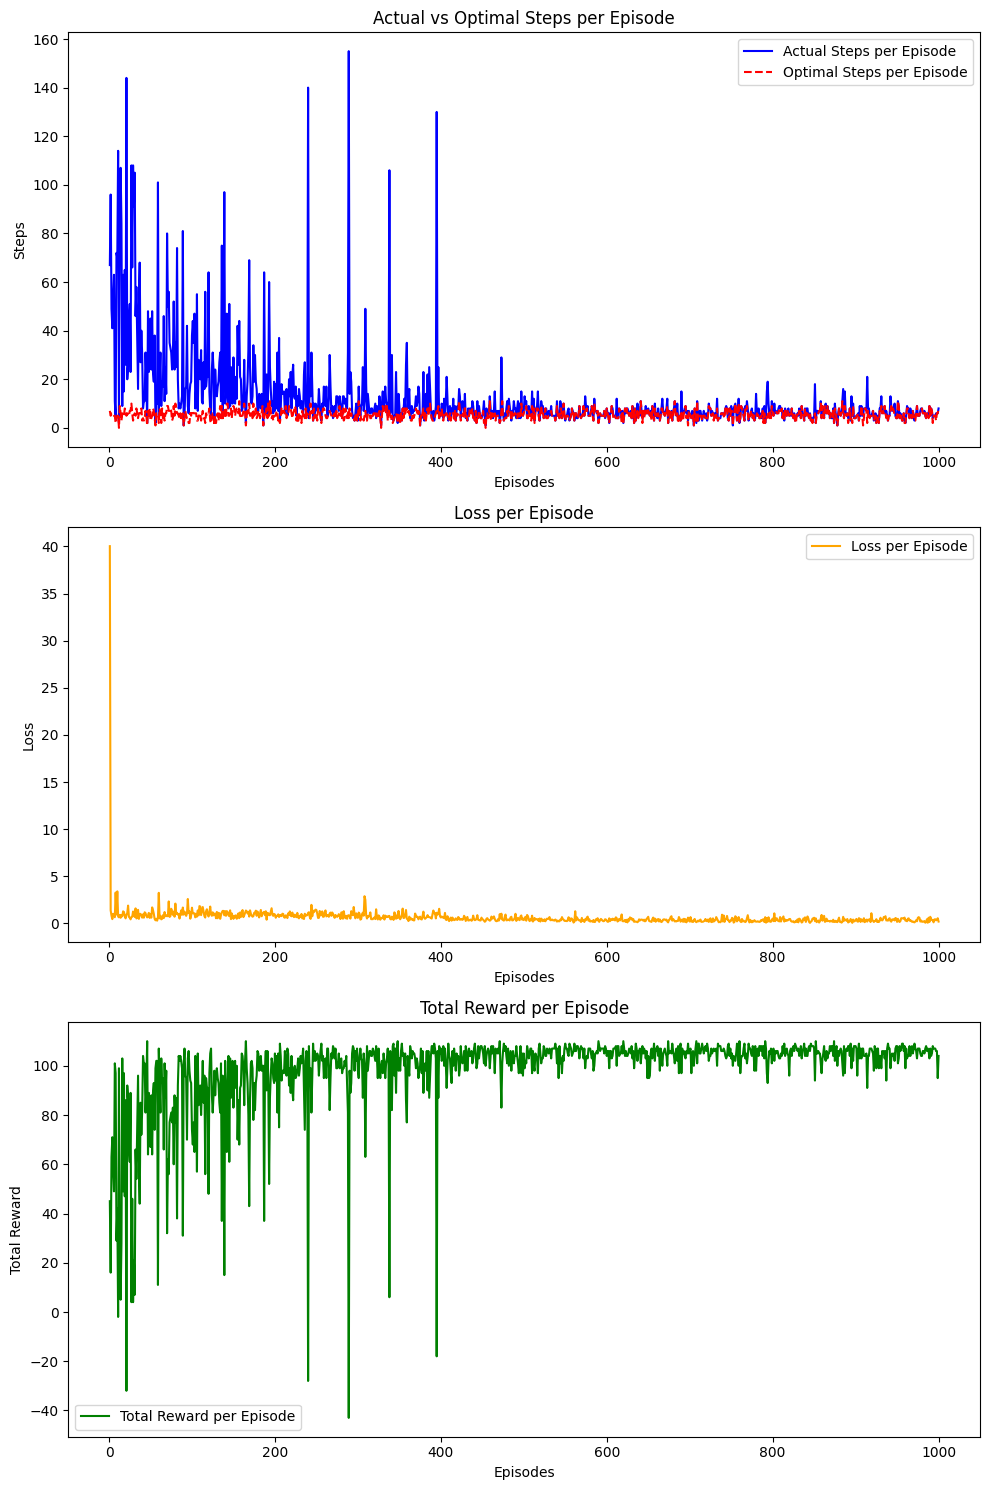

In [8]:
env = GridWorldGUI(size=4)  # the grid is 4x4
state_size = 4 * 4 * 3  # 48 status features
action_size = 4  # 4 actions: 'north', 'south', 'west', 'east'

agent = DQNAgentGUI(env, state_size, action_size)
agent.train(episodes=1000)


In [21]:
def test_agent(agent, env, episodes=5):
    """
    Test the DQN agent to evaluate its performance in the environment. This function runs the agent
    through a specified number of test episodes and outputs the total reward and steps for each episode.
    
    Args:
        agent (DQNAgentGUI): The trained DQN agent.
        env (GridWorldGUI): The environment to test in.
        episodes (int): The number of test episodes to run (default is 5).
    
    Returns:
        None
    """
    total_rewards = []
    total_steps = []

    # Disable epsilon-greedy strategy during testing by setting epsilon to 0
    original_epsilon = agent.epsilon
    agent.epsilon = 0  #Disable random exploration

    for episode in range(episodes):
        state = env.reset() # Reset the environment for each episode
        state = agent.flatten_state(state)
        done = False
        total_reward = 0
        steps = 0

        while not done:
            
            action = agent.choose_action(state)
            next_state, reward, done = agent.env.step(agent.actions[action])
            next_state = agent.flatten_state(next_state)
            state = next_state  # Update state
            total_reward += reward  # Accumulate reward
            steps += 1  # Accumulate steps

        total_rewards.append(total_reward)
        total_steps.append(steps)

        # Print the test results for each episode
        print(f"Test Episode {episode + 1}: Total Reward = {total_reward}, Steps = {steps}")

    # Restore epsilon to its original value after testing
    agent.epsilon = original_epsilon

     # Print the average test results
    print(f"Average Reward over {episodes} episodes: {sum(total_rewards) / episodes}")
    print(f"Average Steps over {episodes} episodes: {sum(total_steps) / episodes}")


In [22]:
test_agent(agent, env, episodes=5)

Test Episode 1: Total Reward = 104, Steps = 8
Test Episode 2: Total Reward = 104, Steps = 8
Test Episode 3: Total Reward = 107, Steps = 5
Test Episode 4: Total Reward = 104, Steps = 8
Test Episode 5: Total Reward = 108, Steps = 4
Average Reward over 5 episodes: 105.4
Average Steps over 5 episodes: 6.6


The test procedure evaluates a trained Deep Q-Network (DQN) agent by running multiple episodes in a simulated environment. The agent's epsilon is set to 0, meaning it selects actions purely based on its learned Q-values without randomness. For each episode, the environment is reset, and the agent interacts by selecting actions, receiving rewards, and updating its state until the episode ends. Key metrics used are total reward (sum of rewards earned in an episode), steps taken (number of actions in an episode), and their averages across episodes. Higher total rewards with fewer steps indicate that the agent is effectively and efficiently solving tasks. The test provides a comprehensive measure of the agent's performance and consistency.

We can observe that during the initial stages of training, the reward is quite unstable, and sometimes even results in negative rewards. Additionally, the number of steps remains relatively high. As epsilon decreases over time, reducing the likelihood of random action selection, the agent is able to utilize Deep Q-learning to acquire the item and reach the target with near-optimal steps. Based on the test results, the agent is approaching the optimal solution and significantly outperforms random action selection.

In conclusion, the agent demonstrates substantial improvement as training progresses, particularly as exploration reduces and exploitation of learned policies increases. The use of Deep Q-learning has enabled the agent to achieve consistent performance by effectively balancing exploration and exploitation, eventually leading to near-optimal behavior. The results also highlight the advantage of reinforcement learning over random decision-making in complex environments like this grid world scenario.

In [12]:
# torch.save(agent.q_network.state_dict(),"after1000.pth") # save network

In [13]:
# torch.save(agent.target_network.state_dict(),"t_after1000.pth")